In [1]:
# Import libraries

import pandas as pd
import numpy as np

In [2]:
import scipy.stats as stats
import os
import random

In [3]:
import statsmodels.api as sm
import statsmodels.stats.multicomp

In [4]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [5]:
os.getcwd()

'C:\\Users\\hp'

In [8]:
os.chdir('C:\\Users\\hp\\Desktop\\covid')

In [9]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\covid'

In [10]:
#Load data
StatewiseTestingDetails=pd.read_csv('./StatewiseTestingDetails.csv')
population_india_census2011=pd.read_csv('./population_india_census2011.csv')

In [11]:
population_india_census2011.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [12]:
StatewiseTestingDetails.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [13]:
StatewiseTestingDetails['Positive'].sort_values().head()

367     0.0
1278    0.0
1279    0.0
1280    0.0
1281    0.0
Name: Positive, dtype: float64

In [14]:
#list down the states which have 0 corona cases
StatewiseTestingDetails['State'][StatewiseTestingDetails['Positive']==0].unique()

array(['Dadra and Nagar Haveli and Daman and Diu', 'Nagaland', 'Sikkim'],
      dtype=object)

In [15]:
#List down the states which have 1 corona case
StatewiseTestingDetails['State'][StatewiseTestingDetails['Positive']==1].unique()

array(['Arunachal Pradesh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Mizoram', 'Sikkim'], dtype=object)

In [16]:
#we see that there're many entries with 0. that meansno case has been detected, so we can add 1 in all entries.
#so while performing any sort of data transfromation that involves log in it, won't give error.
StatewiseTestingDetails['Positive']=StatewiseTestingDetails['Positive']+1 

In [17]:
StatewiseTestingDetails['Positive'].sort_values()

367     1.0
1278    1.0
1279    1.0
1280    1.0
1281    1.0
       ... 
1858    NaN
1859    NaN
1860    NaN
1861    NaN
1882    NaN
Name: Positive, Length: 1923, dtype: float64

In [19]:
#Imput missing values by median of each state
stateMedianData=StatewiseTestingDetails.groupby('State')[['Positive']].median().\
                                    reset_index().rename(columns={'Positive':'Median'})
stateMedianData.head()

,State,Median
0,Andaman and Nicobar Islands,34.0
1,Andhra Pradesh,1956.0
2,Arunachal Pradesh,3.0
3,Assam,65.0
4,Bihar,565.0


In [20]:
StatewiseTestingDetails.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,13.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,28.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,34.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,34.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,34.0


In [21]:
for index,row in StatewiseTestingDetails.iterrows():
    if pd.isnull(row['Positive']):
        StatewiseTestingDetails['Positive'][index]=int(stateMedianData['Median'][stateMedianData['State']==row['State']])

D:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
StatewiseTestingDetails['Positive'].sort_values()

1292        1.0
1287        1.0
1288        1.0
1289        1.0
1290        1.0
         ...   
1132    80230.0
1133    82969.0
1134    85976.0
1135    88529.0
1136    90788.0
Name: Positive, Length: 1923, dtype: float64

In [28]:
StatewiseTestingDetails.columns

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')

In [29]:
population_india_census2011.columns

Index(['Sno', 'State / Union Territory', 'Population', 'Rural population',
       'Urban population', 'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [32]:
population_india_census2011.columns = ['Sno', 'State', 'Population', 'Rural population',
       'Urban population', 'Area', 'Density', 'Gender Ratio']

In [33]:
population_india_census2011.columns

Index(['Sno', 'State', 'Population', 'Rural population', 'Urban population',
       'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [34]:
#Merge StatewiseTestingDetails & population_india_census2011 dataframes
data=pd.merge(StatewiseTestingDetails,population_india_census2011,on='State')

In [35]:
data.head()

,Date,State,TotalSamples,Negative,Positive,Sno,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,13.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,28.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,34.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,34.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,34.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876


In [36]:
data.shape

(1919, 12)

In [37]:
##Sort the Data Frame
data['Positive'].sort_values()

1292        1.0
1287        1.0
1288        1.0
1289        1.0
1290        1.0
         ...   
1132    80230.0
1133    82969.0
1134    85976.0
1135    88529.0
1136    90788.0
Name: Positive, Length: 1919, dtype: float64

In [38]:
#Write a function to create densityGroup bucket
def densityCheck(data):
    data['density_Group']=0
    for index,row in data.iterrows():
        status=None
        i=row['Density'].split('/')[0]
        try:
            if (',' in i):
                i=int(i.split(',')[0]+i.split(',')[1])
            elif ('.' in i):
                i=round(float(i))
            else:
                i=int(i)
        except ValueError as err:
            pass
        try:
            if (0<i<=300):
                status='Dense1'
            elif (300<i<=600):
                status='Dense2'
            elif (600<i<=900):
                status='Dense3'
            else:
                status='Dense4'
        except ValueError as err:
            pass
        data['density_Group'].iloc[index]=status
    return data

In [39]:
data.columns

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive', 'Sno',
       'Population', 'Rural population', 'Urban population', 'Area', 'Density',
       'Gender Ratio'],
      dtype='object')

In [40]:
data['Positive'].sort_values()

1292        1.0
1287        1.0
1288        1.0
1289        1.0
1290        1.0
         ...   
1132    80230.0
1133    82969.0
1134    85976.0
1135    88529.0
1136    90788.0
Name: Positive, Length: 1919, dtype: float64

In [41]:
#Map each state as per its density group
data=densityCheck(data)

D:\python\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
#We'll export this data so we can use it for Two - way ANOVA test.
stateDensity=data[['State','density_Group']].drop_duplicates().sort_values(by='State')

In [44]:
data['Positive'].sort_values()

1292        1.0
1287        1.0
1288        1.0
1289        1.0
1290        1.0
         ...   
1132    80230.0
1133    82969.0
1134    85976.0
1135    88529.0
1136    90788.0
Name: Positive, Length: 1919, dtype: float64

In [45]:
data.to_csv('data.csv',index=False)
stateDensity.to_csv('stateDensity.csv',index=False)

In [46]:
data.head()

,Date,State,TotalSamples,Negative,Positive,Sno,Population,Rural population,Urban population,Area,Density,Gender Ratio,density_Group
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,13.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,Dense1
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,28.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,Dense1
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,34.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,Dense1
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,34.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,Dense1
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,34.0,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46/km2 (120/sq mi),876,Dense1


In [47]:
data.describe()

,TotalSamples,Negative,Positive,Sno,Population,Rural population,Urban population,Gender Ratio
count,1919.000000,1484.000000,1919.000000,1919.000000,1.919000e+03,1.919000e+03,1.919000e+03,1919.000000
mean,70391.240750,69495.985175,2925.740490,16.787910,3.920747e+07,2.699313e+07,1.221434e+07,939.021365
std,108949.230899,110003.871656,8259.792186,9.977208,4.461145e+07,3.348932e+07,1.357736e+07,64.098522
min,58.000000,0.000000,1.000000,1.000000,2.740000e+05,2.899100e+04,1.434880e+05,711.000000
25%,4729.500000,4502.500000,38.000000,8.000000,2.570390e+06,1.407536e+06,8.527530e+05,912.000000
50%,20877.000000,19334.500000,370.000000,17.000000,2.554520e+07,1.734419e+07,7.933061e+06,948.000000
75%,89414.500000,82360.000000,2106.000000,26.000000,6.109530e+07,3.722959e+07,1.704808e+07,976.000000
max,638846.000000,601363.000000,90788.000000,35.000000,1.998123e+08,1.553173e+08,5.081826e+07,1084.000000


In [48]:
#Rearrange dataframe

df=pd.DataFrame({'Dense1':data[data['density_Group']=='Dense1']['Positive'],
                 'Dense2':data[data['density_Group']=='Dense2']['Positive'],
                 'Dense3':data[data['density_Group']=='Dense3']['Positive'],
                 'Dense4':data[data['density_Group']=='Dense4']['Positive']})

In [50]:
data.isna().sum()

Date                  0
State                 0
TotalSamples          0
Negative            435
Positive              0
Sno                   0
Population            0
Rural population      0
Urban population      0
Area                  0
Density               0
Gender Ratio          0
density_Group         0
dtype: int64

In [51]:
data[data['Positive'].isna()]

,Date,State,TotalSamples,Negative,Positive,Sno,Population,Rural population,Urban population,Area,Density,Gender Ratio,density_Group


In [52]:
df.dtypes

Dense1    float64
Dense2    float64
Dense3    float64
Dense4    float64
dtype: object

In [53]:
####################### Approach 1.##########

In [54]:
np.random.seed(1234)
dataNew=pd.DataFrame({'Dense1':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
                      'Dense2':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
                      'Dense3':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10),
                      'Dense4':random.sample(list(data['Positive'][data['density_Group']=='Dense1']), 10)})

In [56]:
dataNew.head()

,Dense1,Dense2,Dense3,Dense4
0,294.0,3468.0,369.0,1.0
1,98.0,408.0,776.0,3.0
2,37.0,8090.0,41.0,1661.0
3,15.0,68.0,9402.0,1.0
4,1.0,51.0,29.0,7.0


In [57]:
dataNew.describe()

,Dense1,Dense2,Dense3,Dense4
count,10.000000,10.000000,10.000000,10.000000
mean,1264.200000,1304.300000,1831.700000,492.900000
std,2977.071148,2612.260156,3022.708684,702.347722
min,1.000000,1.000000,3.000000,1.000000
25%,14.250000,22.500000,45.250000,4.000000
50%,28.000000,64.500000,384.000000,13.500000
75%,245.000000,762.000000,2632.250000,777.750000
max,9374.000000,8090.000000,9402.000000,1724.000000


In [58]:
dataNew['Dense1'].sort_values().head()

4     1.0
6     1.0
7    14.0
3    15.0
8    19.0
Name: Dense1, dtype: float64

In [59]:
dataNew.describe()

,Dense1,Dense2,Dense3,Dense4
count,10.000000,10.000000,10.000000,10.000000
mean,1264.200000,1304.300000,1831.700000,492.900000
std,2977.071148,2612.260156,3022.708684,702.347722
min,1.000000,1.000000,3.000000,1.000000
25%,14.250000,22.500000,45.250000,4.000000
50%,28.000000,64.500000,384.000000,13.500000
75%,245.000000,762.000000,2632.250000,777.750000
max,9374.000000,8090.000000,9402.000000,1724.000000


In [60]:
dataNew['Dense1'].sort_values().head()

4     1.0
6     1.0
7    14.0
3    15.0
8    19.0
Name: Dense1, dtype: float64

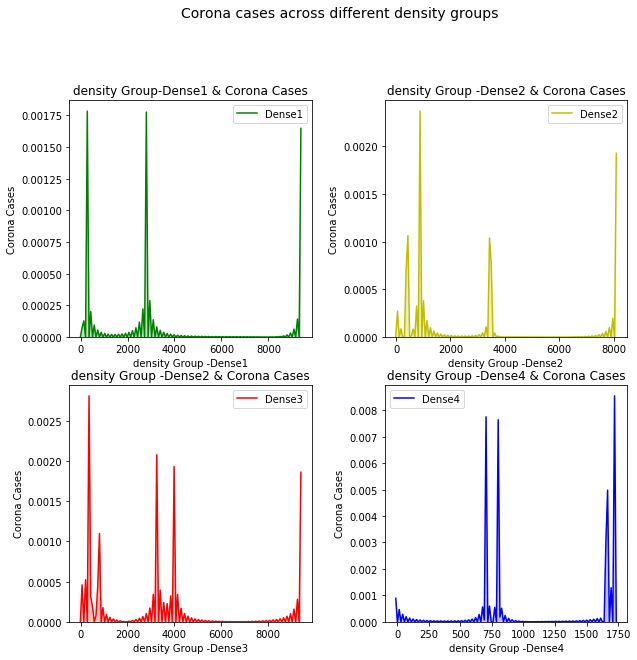

In [62]:
#Plot number of Corona cases across different density groups to check their distribution.
fig = plt.figure(figsize=(10,10))
title = fig.suptitle("Corona cases across different density groups", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(2,2,1)
ax1.set_title("density Group-Dense1 & Corona Cases")
ax1.set_xlabel("density Group -Dense1")
ax1.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense1'], ax=ax1, shade=True,bw=4, color='g')

ax2 = fig.add_subplot(2,2,2)
ax2.set_title("density Group -Dense2 & Corona Cases")
ax2.set_xlabel("density Group -Dense2")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense2'], ax=ax2, shade=True,bw=4, color='y')

ax2 = fig.add_subplot(2,2,3)
ax2.set_title("density Group -Dense2 & Corona Cases")
ax2.set_xlabel("density Group -Dense3")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense3'], ax=ax2, shade=True,bw=4, color='r')

ax2 = fig.add_subplot(2,2,4)
ax2.set_title("density Group -Dense4 & Corona Cases")
ax2.set_xlabel("density Group -Dense4")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense4'], ax=ax2, shade=True,bw=4, color='b')

In [63]:
## Apply BoxCox Transformation to bring the data to close to Gaussian Distribution 
dataNew['Dense1'],fitted_lambda = stats.boxcox(dataNew['Dense1'])
dataNew['Dense2'],fitted_lambda = stats.boxcox(dataNew['Dense2'])
dataNew['Dense3'],fitted_lambda = stats.boxcox(dataNew['Dense3'])
dataNew['Dense4'],fitted_lambda = stats.boxcox(dataNew['Dense4'])

In [64]:
#Apply log transformation to treat outliers and to bring to normal distribution

In [65]:
dataNew.describe()

,Dense1,Dense2,Dense3,Dense4
count,10.000000,10.000000,10.000000,10.000000
mean,3.253249,4.627482,6.966577,3.097204
std,2.287813,2.964753,3.558847,2.481928
min,0.000000,0.000000,1.136178,0.000000
25%,2.436609,2.919116,4.276641,1.259981
50%,2.944656,4.189760,7.170099,2.421093
75%,4.544029,6.649509,9.886923,5.554321
max,6.867496,9.113560,12.242706,6.091563


In [66]:
dataNew.head()

,Dense1,Dense2,Dense3,Dense4
0,4.739831,8.245771,7.113960,0.000000
1,3.956625,6.062523,8.203668,1.065465
2,3.213133,9.113560,4.166774,6.067023
3,2.479989,4.244719,12.242706,0.000000
4,0.000000,3.953711,3.737216,1.843528


In [67]:
dataNew['Dense1'].describe()

count    10.000000
mean      3.253249
std       2.287813
min       0.000000
25%       2.436609
50%       2.944656
75%       4.544029
max       6.867496
Name: Dense1, dtype: float64

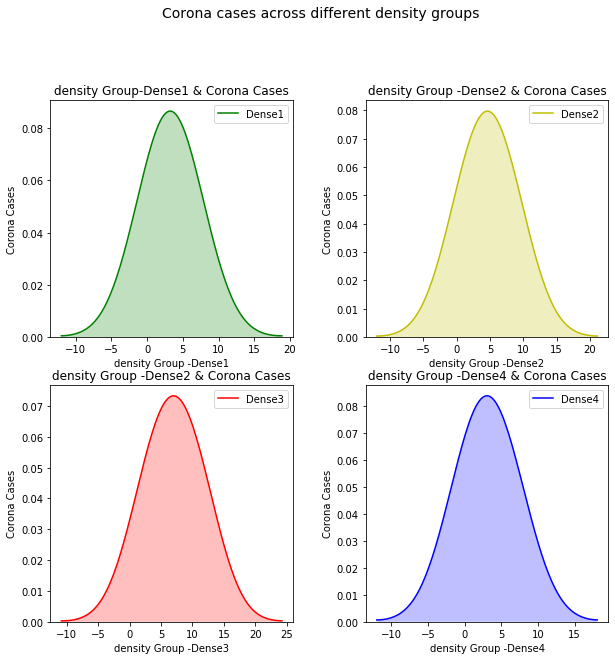

In [68]:
#Plot different density groups
fig = plt.figure(figsize=(10,10))
title = fig.suptitle("Corona cases across different density groups", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(2,2,1)
ax1.set_title("density Group-Dense1 & Corona Cases")
ax1.set_xlabel("density Group -Dense1")
ax1.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense1'], ax=ax1, shade=True,bw=4, color='g')

ax2 = fig.add_subplot(2,2,2)
ax2.set_title("density Group -Dense2 & Corona Cases")
ax2.set_xlabel("density Group -Dense2")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense2'], ax=ax2, shade=True,bw=4, color='y')

ax2 = fig.add_subplot(2,2,3)
ax2.set_title("density Group -Dense2 & Corona Cases")
ax2.set_xlabel("density Group -Dense3")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense3'], ax=ax2, shade=True,bw=4, color='r')

ax2 = fig.add_subplot(2,2,4)
ax2.set_title("density Group -Dense4 & Corona Cases")
ax2.set_xlabel("density Group -Dense4")
ax2.set_ylabel("Corona Cases") 
sns.kdeplot(dataNew['Dense4'], ax=ax2, shade=True,bw=4, color='b')

In [69]:
#############Assumptions check - Normality
stats.shapiro(dataNew['Dense1'])

(0.9449063539505005, 0.6087790131568909)

In [70]:
stats.shapiro(dataNew['Dense2'])

(0.9696035981178284, 0.88714599609375)

In [71]:
stats.shapiro(dataNew['Dense3'])

(0.9640777111053467, 0.8311745524406433)

In [72]:
stats.shapiro(dataNew['Dense4'])

(0.8606433868408203, 0.07765328139066696)

In [73]:
# Levene variance test  
stats.levene(dataNew['Dense1'],dataNew['Dense2'],dataNew['Dense3'],dataNew['Dense4'])

LeveneResult(statistic=0.740765662354396, pvalue=0.5347384307225311)

In [79]:
##p-value is more than 0.05 , So we can say that variances among groups are equal.

In [74]:
F, p = stats.f_oneway(dataNew['Dense1'],dataNew['Dense2'],dataNew['Dense3'],dataNew['Dense4'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=3.905, p=0.016


In [75]:
#Rearrange DataFrame
newDf=dataNew.stack().to_frame().reset_index().rename(columns={'level_1':'density_Group',
                                                               0:'Count'})
del newDf['level_0']

In [76]:
# using Ols Model
model = ols('Count ~ C(density_Group)', newDf).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     3.905
Date:                Fri, 12 Jun 2020   Prob (F-statistic):             0.0163
Time:                        14:20:55   Log-Likelihood:                -96.763
No. Observations:                  40   AIC:                             201.5
Df Residuals:                      36   BIC:                             208.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.2532      0.906      3.590      0.001       1.415       5.091
C(density_Group)[T.Dense2]     1.3742      1.282      1.072      0.291      -1.225       3.973
C(density_Group)[T.Dense3]     3.7133      1.282      2.897      0.006       1.114       6.313
C(density_Group)[T.Dense4]    -0.1560      1.282     -0.122      0.904      -2.755       2.443
==============================================================================
Omnibus:                        2.265   Durbin-Watson:                   2.400
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.286
Skew:                          -0.005   Prob(JB):                        0.526
Kurtosis:                       2.122   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 3, 36) =  3.905, p =  0.0163


In [78]:
# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

,sum_sq,df,F,PR(>F)
C(density_Group),96.217102,3.0,3.905406,0.016337
Residual,295.642842,36.0,NaN,NaN


In [80]:
#So Based on p-value we can reject the H0; that is there's no significant difference as per density of an area 
#and number of corona cases

In [81]:
#So what if you find statistical significance?  Multiple comparison tests

#When you conduct an ANOVA, you are attempting to determine if there is a statistically significant difference among the groups.
#If you find that there is a difference, you will then need to examine where the group differences lay.

In [82]:
newDf.dtypes

density_Group     object
Count            float64
dtype: object

In [83]:
newDf.head()

,density_Group,Count
0,Dense1,4.739831
1,Dense2,8.245771
2,Dense3,7.113960
3,Dense4,0.000000
4,Dense1,3.956625


In [84]:
#Post hoc test
mc = statsmodels.stats.multicomp.MultiComparison(newDf['Count'],newDf['density_Group'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Dense1 Dense2   1.3742 0.6878 -2.0774  4.8259  False
Dense1 Dense3   3.7133 0.0309  0.2617   7.165   True
Dense1 Dense4   -0.156    0.9 -3.6077  3.2956  False
Dense2 Dense3   2.3391 0.2786 -1.1125  5.7907  False
Dense2 Dense4  -1.5303 0.6205 -4.9819  1.9214  False
Dense3 Dense4  -3.8694  0.023  -7.321 -0.4177   True
----------------------------------------------------


In [85]:
#tuckey HSD test clearly says that there's a significant difference between Group1 & Group4

In [86]:
#Above results from Tukey HSD suggests that except Dense1-Dense4 groups, all other pairwise comparisons for number of 
#corona cases rejects null hypothesis and indicates statistical significant differences.

In [87]:
### Normality Assumption check
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9723532199859619 0.4259151816368103


In [88]:
#Homogeneity of variances Assumption check
w, pvalue = stats.bartlett(newDf['Count'][newDf['density_Group']=='Dense1'], newDf['Count'][newDf['density_Group']=='Dense2']
                           , newDf['Count'][newDf['density_Group']=='Dense3'], newDf['Count'][newDf['density_Group']=='Dense4'])
print(w, pvalue)

2.0369702362958173 0.5647689598561991


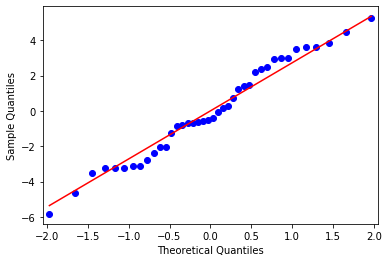

In [89]:
# Q-Q Plot for Normal Distribution check-
#Check the Normal distribution of residuals
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()